$$CONCEITO:$$

- **Técnica supervisionada de machine learning utilizada para explicar ou predizer a probabilidade de ocorrência de determinado evento em função de uma ou mais variáveis explicativas**


- **Distribuição de Bernulli** = Distribuição Binaria


- **Logito** = : logaritmo natural da chance de ocorrência de uma resposta do tipo “sim” , igual a formula da regressão linear, porém no formato de logaritmo


- **Probabilidade** = : Transformar o Logito em probabilidade de ocorrência ou não do evento, variando de 0 a 1


- **Loglik** = Quanto mais próximo a probabilidade estiver dos extremos (0 ou 1) e da previsão correta, menor vai ser o loglike, e quanto menor o loglike melhor o modelo, EX de perfeito fit: Probabilidade = 0 ,Previsão = 0, loglike =0 ou  probabilidade = 1,previsão = 1, loglike = 0 , se a probabilidade for 0.5 ou a previsão estiver errada o loglike vai ser alto, pois a probabilidade não conseguiu definir corretamente a porcentagem da variável target


- **Chi²** = É igual a Estatística f na regressao linear, se pelo menos 1 variavel for estatisticamente significante o Chi² vai ser < 0.05



- **Matriz de Confusão** = Avaliação do modelo , entre erros e acertos 


- **Cutoff** = é o ponto de corte da probabilidade do evento ocorrer ou não, dependendo do ponto de corte alterará a matriz de conf.


- **Acuracia** = é o total de acertos do modelo 


- **Sensitividade** = é o total de acertos somente da ocorrência do evento


- **Especificidade** = é o total de acertos somente da ocorrência do NAO Evento 


- **Curva Roc** = Especificidade e Sensitividade X Cutoff = definir o melhor ponto de corte para o modelo


- **AUC** = é a % explicada pelos dados na curva ROC com base na sensitividade e Especificidade 

**Comparação entre Modelos:**

- **LRT** = Compara modelos pelo teste chi² a partir dos LogLikes


- **Teste Delong** = Comparação da Curva Roc entre Modelos diferentes


- **AIC e BIC** = método de comparação de modelos vai de  0 a infinito , sendo quanto menor melhor o modelo


In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# Banco de dados 

In [2]:
# Carregando o dataset
dados = pd.read_csv('Atrasado.csv',encoding='latin1',sep=',')
dados = dados.set_index('estudante')
dados


,atrasado,dist,sem
estudante,,,
Gabriela,0,12.5,7
Patrícia,0,13.3,10
Gustavo,0,13.4,8
Letícia,0,23.5,7
Luiz Ovídio,0,9.5,8
...,...,...,...
Sheila,1,24.0,10
Pedro,1,10.0,10
Horácio,1,9.4,10


**Tabela com 100 observações e 3 variáveis**

In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Gabriela to Estela
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   atrasado  100 non-null    int64  
 1   dist      100 non-null    float64
 2   sem       100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.1+ KB


**São 3 variáveis quantitativas, sendo a variável resposta dicotômica**


In [4]:
#Descrição dos dados
dados.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000



**Não existe análise quantitativa para variáveis dicotômica ou policotômicas**


In [5]:
#tabela de frequencia da var Y
dados.atrasado.value_counts()

1    59
0    41
Name: atrasado, dtype: int64

**A Variável Y não precisa estar balanceada na regressao logistica**


# Modelo

In [6]:
import statsmodels.api as sm
x = dados.iloc[:,1:3]
y= dados.iloc[:,0]

x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.Logit(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
modelo_fit = modelo.fit() # Treinar o modelo
modelo_fit.summary() # Verificar os dados do modelo


Optimization terminated successfully.
         Current function value: 0.504664
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.2544
Time:                        13:28:55   Log-Likelihood:                -50.466
converged:                       True   LL-Null:                       -67.686
Covariance Type:            nonrobust   LLR p-value:                 3.324e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.1665      8.442     -3.100      0.002     -42.713      -9.620
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

- **Não existe R² quando a variáveis target for qualitativa**


- **Variável Target qualitativa não gera p_values da estatística T e sim da estatística Z(normal padronizada), pois ao estimar varios modelos, os dados regridem ao uma normal padrão**




# Encontrar os parâmetros dos modelos

## Logito

In [7]:
#Logito

a = modelo_fit.params[0]
b1 = modelo_fit.params[1]
b2 = modelo_fit.params[2]

dados['Logito'] = a +b1*x['dist']+b2*x['sem']
dados

#OU 

# modelo_fit.fittedvalues

,atrasado,dist,sem,Logito
estudante,,,,
Gabriela,0,12.5,7,-7.246693
Patrícia,0,13.3,10,-0.005755
Gustavo,0,13.4,8,-4.712476
Letícia,0,23.5,7,-5.152567
Luiz Ovídio,0,9.5,8,-5.454939
...,...,...,...,...
Sheila,1,24.0,10,2.031259
Pedro,1,10.0,10,-0.633993
Horácio,1,9.4,10,-0.748218


## Probabilidade

In [8]:
#Probabilidade
dados['Probabilidade'] = 1/(1+np.exp(-dados['Logito']))
dados

#Ou

# modelo_fit.predict(x_interc)

,atrasado,dist,sem,Logito,Probabilidade
estudante,,,,,
Gabriela,0,12.5,7,-7.246693,0.000712
Patrícia,0,13.3,10,-0.005755,0.498561
Gustavo,0,13.4,8,-4.712476,0.008903
Letícia,0,23.5,7,-5.152567,0.005751
Luiz Ovídio,0,9.5,8,-5.454939,0.004257
...,...,...,...,...,...
Sheila,1,24.0,10,2.031259,0.884040
Pedro,1,10.0,10,-0.633993,0.346606
Horácio,1,9.4,10,-0.748218,0.321210


**Transforma o Logito em probabilidade entre 0 (não evento) e 1 (evento)**

## Log-likelihood(Verossimilhança)

In [9]:
#Loglike

dados['loglike']  = (y *np.log(dados['Probabilidade']))+((1-y)*np.log(1-dados['Probabilidade']))
dados

,atrasado,dist,sem,Logito,Probabilidade,loglike
estudante,,,,,,
Gabriela,0,12.5,7,-7.246693,0.000712,-0.000712
Patrícia,0,13.3,10,-0.005755,0.498561,-0.690274
Gustavo,0,13.4,8,-4.712476,0.008903,-0.008942
Letícia,0,23.5,7,-5.152567,0.005751,-0.005768
Luiz Ovídio,0,9.5,8,-5.454939,0.004257,-0.004266
...,...,...,...,...,...,...
Sheila,1,24.0,10,2.031259,0.884040,-0.123253
Pedro,1,10.0,10,-0.633993,0.346606,-1.059567
Horácio,1,9.4,10,-0.748218,0.321210,-1.135661


**Quanto mais próximo as probabilidades estiverem dos extremos (0 ou 1) e a previsão estiver correta, menor vai ser o valor do loglike**

### Threshold (Converter probabilidade em Classe , definindo um ponto de corte)

In [10]:
#Threshold 
THRESHOLD = 0.5

dados['y_chapeu'] = np.where(dados.iloc[:,4] >= 0.5, 1, 0)
dados

,atrasado,dist,sem,Logito,Probabilidade,loglike,y_chapeu
estudante,,,,,,,
Gabriela,0,12.5,7,-7.246693,0.000712,-0.000712,0
Patrícia,0,13.3,10,-0.005755,0.498561,-0.690274,0
Gustavo,0,13.4,8,-4.712476,0.008903,-0.008942,0
Letícia,0,23.5,7,-5.152567,0.005751,-0.005768,0
Luiz Ovídio,0,9.5,8,-5.454939,0.004257,-0.004266,0
...,...,...,...,...,...,...,...
Sheila,1,24.0,10,2.031259,0.884040,-0.123253,1
Pedro,1,10.0,10,-0.633993,0.346606,-1.059567,0
Horácio,1,9.4,10,-0.748218,0.321210,-1.135661,0


**Dependendo do valor da escolha do Threshold, pode mudar o número de acertos e erros do modelo**

# Parâmetros do modelo

## Chi² (Igual ao teste F na Regressao linear, verificar se algum beta é estatisticamente significante)

- **Na regressao logistica a distribuição do Logito tende a uma distribuição normal, portanto para ver se os parâmetros sao estatisticamente significantes o p-value vai ser dado através da estatística Z**


- **LLo = Log-Likelihood do modelo só com o alpha**


- **LLm = Log-Likelihood do modelo completo**


- **chi² = -2 (LLo - LLm)**


**Objetivo: Comparar os 2 modelos e avaliar se pelo menos um beta tem significância estatística para explicar a existência do modelo**


- **p_value > 0.05, não rejeita a hipótese nula, betas não tem significância estatística no modelo**


- **p_value < 0.05, rejeita a hipótese nula, betas tem significância estatística no modelo**


In [11]:
#LLo = Criar um modelo somente com o parâmetro alpha

x_interc = sm.add_constant(x.values)[:,0] # Somente a constante = 1
modelo2 = sm.Logit(y,x_interc) 
LLo = modelo2.fit() # Treinar o modelo
LLo.llf # Log-Likelihood: Max Verossimilhança

Optimization terminated successfully.
         Current function value: 0.676859
         Iterations 4


-67.68585467349509

**Valor do Loglike somente com o parâmetro alpha, vamos subtrair do loglike do modelo já calculado com todas as variáveis**

In [12]:
#Chi²
chi2 = -2*(LLo.llf -modelo_fit.llf )

#p_value do teste chi²
modelo_fit.llr_pvalue

3.324122079343766e-08

**Teste chi², comparação dos loglikes, somente com o alpha e com as variáveis explicativas**

**p_value < 0.05, rejeita a hipótese nula, betas tem significância estatística no modelo**

## AIC e BIC para comparar os modelos (igual ao R²Ajustado)

- **AIC** = Comparar os modelos, igual ao R²ajustado


- **LLm** = Log-Likelihood do modelo completo 


- **k** = Numero de parâmetros incluindo o alpha


In [13]:
#AIC
#Parametros
LLm = modelo_fit.llf
k = len(modelo_fit.params)

#Modelo AIC
AIC = -2*(LLm)+2*k

#OU 

modelo_fit.aic

#O modelo que tiver o menor AIC é o melhor modelo

106.93275908379735

**Quando comparamos os modelos AIC, o que tiver menor valor é o modelo que se ajustou melhor aos dados**

In [14]:
#BIC 
#Parametros
LLm = LLm = modelo_fit.llf
t = len(dados.loglike)

#Modelo BIC
BIC = -2*(LLm)+3*np.log(t)

#OU 

modelo_fit.bic

114.74826964176162

**Análogo ao parâmetro BIC, o que tiver menor valor é o modelo que se ajustou melhor aos dados**

# Pseudo R² mcfadden

- Para comparar modelos , apensar do nome, a interpretação não é igual ao R² da regressao linear

In [15]:
# Pseudo R² mcfadden 

# LLo = Log-Likelihood do modelo so com o alpha
LLo = LLo.llf
# LLm = Log-Likelihood do modelo completo 
LLm = modelo_fit.llf

#Criar parâmetro 
mf = ((-2*LLo)-(-2*LLm))/(-2*LLo)
mf



0.2544028617893679

**Quanto maior o valor do Pseudo R² melhor o modelo**

# Avaliação do Modelo

## Matriz de confusão

<AxesSubplot:>

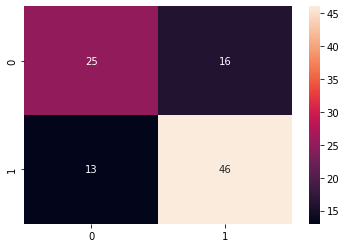

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y,dados['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

## Acurácia

In [17]:
#Acuracia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y,dados['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 71.0%


**Total de acertos do modelo em porcentagem**

## Recall(Sensitividade)

In [18]:
#Recall(Sensitividade)s
from sklearn.metrics import recall_score
recall = recall_score(y,dados['y_chapeu'])
print(f'recall: {recall*100:.1f}%')

recall: 78.0%


**Taxa de acerto dos verdadeiros positivos**

## Specificity

In [19]:
# specificity 
tn, fp, fn, tp = confusion_matrix(y,dados['y_chapeu']).ravel()
specificity = tn / (tn+fp)
print(f'specificity: {specificity*100:.1f}%')

specificity: 61.0%


**Taxa de acerto dos verdadeiros Negativos**

## Precisão

In [20]:
from sklearn.metrics import precision_score
precision = precision_score(y, dados["y_chapeu"])
print(f'Precision: {precision*100:.1f}%')

Precision: 74.2%


**Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas**

## Curva ROC

In [1]:
#Grafico
from sklearn import metrics
roc_fpr,roc_tpr,cutoff=metrics.roc_curve(y,dados["Probabilidade"])
plt.plot(roc_fpr,roc_tpr,linestyle='--')


plt.xlabel('Especificidade')
plt.ylabel('Sensitividade');

NameError: name 'y' is not defined

**Cada ponto em azul determina o cutoff do modelo**

In [ ]:
#Tabela da curva Roc
roc_tab = pd.DataFrame(1-roc_fpr,columns=['Especificidade'])
roc_tab['Sensitividade'] = roc_tpr
roc_tab['Cutoff']= cutoff
roc_tab.iloc[1:,:]

**Observamos na tabela, que dependendo do ponto de corte, os acertos e erros do modelo vão ser totalmente diferentes**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_score = roc_auc_score(y,dados["Probabilidade"]);
print(f'AUC: {roc_score*100:.2f}%')
gini =(roc_score-0.5) /0.5
print(f'GINI: {gini*100:.2f}%')

- AUC = Área abaixo da curva ROC(Área total do gráfico), vai de 0 a 1, quanto maior o valor, melhor o modelo 


- GINI = Área abaixo da curva ROC(metade da área do gráfico), vai de 0 a 1, quanto maior o valor, melhor o modelo


# Conclusão

**Para modelos logísticos usamos como a principal métrica o Log-likelihood, com ele conseguimos determinar o melhor modelo, temos várias outras metricas que podem auxiliar no modelo, porém para conseguir o melhor ajuste nos dados, a inclusão de variáveis estatisticamente significantes é a única maneira de chegar no melhor fit, além é claro de escolher o modelo correto de acordo com a distribuição dos dados**